### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import KNNWithMeans,accuracy,SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise import Dataset,Reader

### Read all the CSV

In [2]:
data1 = pd.read_csv('phone_user_review_file_1.csv', encoding = 'latin')
data2 = pd.read_csv('phone_user_review_file_2.csv', encoding = 'latin')
data3 = pd.read_csv('phone_user_review_file_3.csv', encoding = 'latin')
data4 = pd.read_csv('phone_user_review_file_4.csv', encoding = 'latin')
data5 = pd.read_csv('phone_user_review_file_5.csv', encoding = 'latin')
data6 = pd.read_csv('phone_user_review_file_6.csv', encoding = 'latin')

In [3]:
data1.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [4]:
data2.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [5]:
data = pd.concat([data1, data2, data3, data4, data5, data6])

### Shape of the data

In [6]:
print('There are', data.shape[0], 'rows and',data.shape[1], 'columns')

There are 1415133 rows and 11 columns


### Hence all the data is concatenated

### take a look into data

In [7]:
data.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


### Check for null values

In [8]:
data.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [9]:
data['score'].fillna(0, inplace = True)

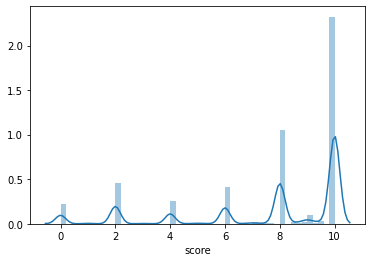

In [10]:
sns.distplot(data['score'])

In [11]:
data['author'].nunique()

801103

In [12]:
data['product'].nunique()

61313

In [13]:
data['source'].nunique()

331

In [14]:
data['country'].nunique()

42

### round off score to integers

In [15]:
data['score'] = round(data['score'],0).astype(int)

In [16]:
data['score'].value_counts()

10    665748
8     305550
2     128762
6     118349
4      73333
0      63531
9      40602
7       8771
5       4730
1       3244
3       2513
Name: score, dtype: int64

In [17]:
data['score'].unique()

array([10,  6,  9,  4,  8,  2,  7,  5,  0,  3,  1])

In [18]:
data['score_max'].unique()

array([10., nan])

In [19]:
data['score_max'].fillna(10, inplace = True)

In [20]:
data['score_max'].unique()

array([10.])

In [21]:
data['author'].fillna('unknown', inplace = True)
data['extract'].fillna('unknown', inplace = True)
data['product'].fillna('unknown', inplace = True)

In [22]:
data.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

### Drop duplicates

In [23]:
data.drop_duplicates(inplace = True)

### Consider a sample size of 1000000

In [24]:
data = data.sample(n = 1000000, random_state = 62)

In [25]:
data.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
292815,/cellphones/alcatel-onetouch-20-04/,12/5/2015,es,es,Amazon,amazon.es,10,10.0,Ha llegado en tiempo rÃ©cord. El telÃ©fono es ...,Patricia,Alcatel Onetouch 2004G - MÃ³vil libre (pantall...
77021,/cellphones/samsung-galaxy-note-iii/,11/20/2013,pt,br,Americanas,americanas.com.br,10,10.0,O Smartphone Ã© Perfeito! Mais rÃ¡pido e mais ...,Alexandre de Paula,Samsung Smartphone Samsung Galaxy Note III Bra...
230539,/cellphones/microsoft-lumia-950-xl/,12/12/2016,it,it,Amazon,amazon.it,2,10.0,NON CAPISCO TUTTE QUESTE RECENSION POSITIVE. I...,Emiliano,"Microsoft Lumia 950 XL Smartphone, 5.7"", camer..."
47532,/cellphones/huawei-honor-7/,7/17/2016,no,no,ElkjÃ¸p,elkjop.no,10,10.0,Jeg har hatt Huawei honour 7 Premium i ca ei u...,Chocolate,Huawei Honor 7 Premium smarttelefon (gull)
134585,/cellphones/sony-xperia-c/,11/5/2013,ru,ru,Ð¡Ð²ÑÐ·Ð½Ð¾Ð¹,svyaznoy.ru,10,10.0,"ÐÐ¿Ð¿Ð°ÑÐ°Ñ Ð¿Ð¾ÑÐ°Ð´Ð¾Ð²Ð°Ð», ÑÐµÐ½Ð°-Ðº...",ÐÐ»ÐµÐºÑÐµÐ¹ ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸ÑÐ¾Ð²Ð¸Ñ,Sony Xperia C (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹)


### Drop irrelevant features

In [26]:
data.drop(['phone_url', 'date', 'domain', 'score_max', 'extract', 'lang', 'country', 'source'], axis = 1, inplace = True)

In [27]:
data.head()

,score,author,product
292815,10,Patricia,Alcatel Onetouch 2004G - MÃ³vil libre (pantall...
77021,10,Alexandre de Paula,Samsung Smartphone Samsung Galaxy Note III Bra...
230539,2,Emiliano,"Microsoft Lumia 950 XL Smartphone, 5.7"", camer..."
47532,10,Chocolate,Huawei Honor 7 Premium smarttelefon (gull)
134585,10,ÐÐ»ÐµÐºÑÐµÐ¹ ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸ÑÐ¾Ð²Ð¸Ñ,Sony Xperia C (ÑÐ¸Ð¾Ð»ÐµÑÐ¾Ð²ÑÐ¹)


### Most rated features

In [28]:
score_product_count = pd.DataFrame(data.groupby('product')['score'].mean()) 
score_product_count['score_counts'] = pd.DataFrame(data.groupby('product')['score'].count())  
score_product_count.sort_values(by = 'score_counts', ascending = False, inplace = True)
score_product_count.head()

,score,score_counts
product,,
"Lenovo Vibe K4 Note (White,16GB)",7.187912,3640
"Lenovo Vibe K4 Note (Black, 16GB)",7.203095,3102
"OnePlus 3 (Graphite, 64 GB)",8.670117,2898
"OnePlus 3 (Soft Gold, 64 GB)",8.490952,2542
Huawei P8lite zwart / 16 GB,8.455579,1936


### Lenovo Vibe K4 Note (White,16GB) is the most rated product

In [29]:
score_author_count = pd.DataFrame(data.groupby('author')['score'].mean()) 
score_author_count['score_counts'] = pd.DataFrame(data.groupby('author')['score'].count())  
score_author_count.sort_values(by = 'score_counts', ascending = False, inplace = True)
score_author_count.head()

,score,score_counts
author,,
Amazon Customer,7.055694,54548
unknown,7.635334,45277
Cliente Amazon,7.991067,13657
e-bit,8.907785,5986
Client d'Amazon,7.242991,5564


### Amazon customer is the author with most number of reviews

In [30]:
score_count = pd.DataFrame(data.groupby(['author','product'])['score'].mean()) 
score_count['score_counts'] = pd.DataFrame(data.groupby(['author','product'])['score'].count())  
score_count.sort_values(by = 'score_counts', ascending = False, inplace = True)
score_count.head()

score  score_counts
author          product                                                    
Amazon Customer Lenovo Vibe K4 Note (White,16GB)     6.961269          2143
                Lenovo Vibe K4 Note (Black, 16GB)    7.066001          1803
                OnePlus 3 (Graphite, 64 GB)          8.483242          1283
                OnePlus 3 (Soft Gold, 64 GB)         8.229885          1218
                Lenovo Vibe K5 (Gold, VoLTE update)  6.573770          1098

In [31]:
final_count = score_count[score_count['score_counts'] > 50].reset_index()

In [32]:
final_count.shape

(382, 4)

In [33]:
top_50 = final_count

### There are totally 382 rows with both product and author more than 50 number of scores

In [34]:
score_author_count[score_author_count['score_counts'] > 50]

,score,score_counts
author,,
Amazon Customer,7.055694,54548
unknown,7.635334,45277
Cliente Amazon,7.991067,13657
e-bit,8.907785,5986
Client d'Amazon,7.242991,5564
...,...,...
Kyle,7.921569,51
Alfonso,8.431373,51
Al,8.000000,51


### There are totally 638 rows with author more than 50 number of scores

In [35]:
score_product_count[score_product_count['score_counts'] > 50]

,score,score_counts
product,,
"Lenovo Vibe K4 Note (White,16GB)",7.187912,3640
"Lenovo Vibe K4 Note (Black, 16GB)",7.203095,3102
"OnePlus 3 (Graphite, 64 GB)",8.670117,2898
"OnePlus 3 (Soft Gold, 64 GB)",8.490952,2542
Huawei P8lite zwart / 16 GB,8.455579,1936
...,...,...
"Huawei SnapTo - 5"" Unlocked Android 4G LTE Smartphone - Quad Core 1.2GHz, 5MP, WiFi, Bluetooth - White (U.S. Warranty)",8.156863,51
"Huawei Honor 8 32GB Smartphone (Unlocked, Midnight Black)",9.450980,51
BLU PURE XR Smartphone - 4G LTE GSM Unlocked - 64GB +4GB RAM - Grey,6.313725,51


### There are totally 4233 rows with product more than 50 number of scores

### popularity based model

In [36]:
above_50_rating_product = score_product_count[score_product_count['score_counts'] > 50]

In [37]:
above_50_rating_product.sort_values(by = ['score', 'score_counts'], ascending = False).head(5)

,score,score_counts
product,,
Samsung Galaxy Note5,10.0,144
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,134
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,133
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP,10.0,119
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip CÃ¢mera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e MemÃ³ria 8GB,10.0,115


In [38]:
def top_n_products(n):
    top_n_product_index = above_50_rating_product.sort_values(by = ['score', 'score_counts'], ascending = False).head(n).index
    print('The top', n , 'Products are as follows: ' )
    for ind,i in zip(range(1,n +1),top_n_product_index):
        print(str(ind) + '.', i)

In [39]:
top_n_products(5)

The top 5 Products are as follows: 
1. Samsung Galaxy Note5
2. Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM
3. Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto
4. Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP
5. Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip CÃ¢mera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e MemÃ³ria 8GB


### A minimum of 50 ratings has been considered and the top 5 products has been recommended based on score and if scores are equal it is based on number of scores provided.

### User-User filtering

In [40]:
reader = Reader(rating_scale=(1, 10))
df = Dataset.load_from_df(data[['author', 'product', 'score']], reader)

In [41]:
trainset, testset = train_test_split(df, test_size=.25,random_state=1)

In [42]:
user_model = KNNWithMeans(k=50, sim_options={'name' : 'pearson_baseline', 'user_based': True})

In [43]:
cross_validate(user_model, df, measures=['RMSE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...


MemoryError: Unable to allocate 897. GiB for an array with shape (490767, 490767) and data type int32

## There were memory issues and hence took a sample and worked upon

In [44]:
data = data.sample(10000, random_state = 2)

In [45]:
reader = Reader(rating_scale=(1, 10))
df = Dataset.load_from_df(data[['author', 'product', 'score']], reader)
trainset, testset = train_test_split(df, test_size=.25,random_state=1)

In [46]:
user_model = KNNWithMeans(k=50, sim_options={'name' : 'pearson_baseline', 'user_based': True})

In [47]:
cross_validate(user_model, df, measures=['RMSE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.1241  3.1149  3.2019  3.1595  3.1318  3.1464  0.0315  
Fit time          2.21    2.31    2.31    2.24    2.25    2.27    0.04    
Test time         0.03    0.03    0.04    0.03    0.03    0.03    0.00    


{'test_rmse': array([3.12407109, 3.11492374, 3.20189167, 3.15945527, 3.13178615]),
 'fit_time': (2.2102229595184326,
  2.3104422092437744,
  2.3115618228912354,
  2.244734764099121,
  2.2491044998168945),
 'test_time': (0.03490638732910156,
  0.03390812873840332,
  0.0359044075012207,
  0.03191661834716797,
  0.03490471839904785)}

In [48]:
user_model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [49]:
test_pred=user_model.test(testset)
print(accuracy.rmse(test_pred))

RMSE: 3.1227
3.1227081203347056


In [50]:
test_pred

[Prediction(uid='gtrff jhy y yyh gghgh bhhyguyhh', iid='Samsung Galaxy J7 SM-J700H/DS GSM Factory Unlocked Smartphone-Android 5.1, 5.5-Inch - Gold', r_ui=10.0, est=7.5342666666666664, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Amazon Customer', iid='OnePlus 3 (Graphite, 64 GB)', r_ui=2.0, est=9.16886059064032, details={'actual_k': 16, 'was_impossible': False}),
 Prediction(uid='gorbax', iid='Samsung Galaxy Gio GT-S5660', r_ui=6.0, est=7.5342666666666664, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='misafir', iid='HTC (187) One (M8)', r_ui=0.0, est=7.5342666666666664, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='unknown', iid='Samsung Galaxy Y Pro Duos GT-B5512', r_ui=10.0, est=7.5342666666666664, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Amazon Customer', iid='OnePlus 3T (Soft Gold, 6GB R

In [51]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == 'einer Kundin'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(10)

,iid,r_ui,est
433,"Apple iPhone 7 4,7"" 32 GB",10.0,10.000000
811,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,...",10.0,9.981723
1656,"Huawei P9 Lite Dual-SIM Smartphone, 13,2 cm (5...",10.0,7.534267
518,"Huawei Nova Smartphone, 12,7 cm (5 Zoll) Displ...",8.0,7.534267


In [52]:
round(pred['est'],0).value_counts()

8.0     2337
7.0       52
10.0      41
6.0       20
9.0       20
4.0       11
2.0       10
1.0        5
5.0        3
3.0        1
Name: est, dtype: int64

#### Many products have ratings around 8

In [53]:
def KNNrecommendation(author):
    ind = 1
    for i in list(pred[pred['uid'] == 'einer Kundin'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)['iid']):
        print(ind, i)
        ind += 1

In [54]:
KNNrecommendation('einer Kundin')

1 Apple iPhone 7 4,7" 32 GB
2 Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)
3 Huawei P9 Lite Dual-SIM Smartphone, 13,2 cm (5,2 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow)
4 Huawei Nova Smartphone, 12,7 cm (5 Zoll) Display, 12,0 Megapixel


### Item-Item Filtering

In [55]:
df = Dataset.load_from_df(data[['product', 'author', 'score']], reader)

In [56]:
trainset, testset = train_test_split(df, test_size=.25,random_state=1)

In [57]:
item_model = KNNWithMeans(k=50, sim_options={'name' : 'pearson_baseline', 'user_based': False})

In [58]:
cross_validate(item_model, df, measures=['RMSE'], cv=5, verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.1804  3.1748  3.1591  3.0604  3.1607  3.1471  0.0441  
Fit time          2.41    2.29    2.34    2.25    2.23    2.30    0.06    
Test time         0.03    0.03    0.03    0.04    0.03    0.03    0.00    


{'test_rmse': array([3.18040646, 3.17481078, 3.15908442, 3.06040081, 3.16073877]),
 'fit_time': (2.408017158508301,
  2.2905404567718506,
  2.33644437789917,
  2.253622531890869,
  2.227802038192749),
 'test_time': (0.03291511535644531,
  0.030931472778320312,
  0.032956600189208984,
  0.03728771209716797,
  0.0339052677154541)}

In [59]:
item_model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [60]:
test_pred=item_model.test(testset)
print(accuracy.rmse(test_pred))

RMSE: 3.1227
3.122702583146605


In [61]:
test_pred

[Prediction(uid='Samsung Galaxy J7 SM-J700H/DS GSM Factory Unlocked Smartphone-Android 5.1, 5.5-Inch - Gold', iid='gtrff jhy y yyh gghgh bhhyguyhh', r_ui=10.0, est=7.5342666666666664, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='OnePlus 3 (Graphite, 64 GB)', iid='Amazon Customer', r_ui=2.0, est=9.16618713849785, details={'actual_k': 16, 'was_impossible': False}),
 Prediction(uid='Samsung Galaxy Gio GT-S5660', iid='gorbax', r_ui=6.0, est=7.5342666666666664, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='HTC (187) One (M8)', iid='misafir', r_ui=0.0, est=7.5342666666666664, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Samsung Galaxy Y Pro Duos GT-B5512', iid='unknown', r_ui=10.0, est=7.5342666666666664, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)', iid

In [62]:
pred = pd.DataFrame(test_pred)

In [63]:
pred[pred['uid'] == 'Lenovo Vibe K5 (Gold, VoLTE update)'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(10)

,iid,r_ui,est
1631,Hardeep Singh Lamba,10.0,7.534267
35,Amazon Customer,8.0,6.999771
1574,Amazon Customer,4.0,6.999771
68,Amazon Customer,2.0,6.999771


In [64]:
round(pred['est'],0).value_counts()

8.0     2337
7.0       52
10.0      41
6.0       20
9.0       20
4.0       11
2.0       10
1.0        5
5.0        3
3.0        1
Name: est, dtype: int64

#### Many products have ratings around 8

### SVD

In [65]:
df = Dataset.load_from_df(data[['author', 'product', 'score']], reader)
trainset, testset = train_test_split(df, test_size=.25,random_state=1)

In [66]:
svd_model = SVD(n_factors=5,biased=False)

In [67]:
cross_validate(svd_model, df, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.5016  3.4966  3.4421  3.4581  3.6244  3.5046  0.0640  
Fit time          0.31    0.30    0.30    0.30    0.30    0.30    0.00    
Test time         0.04    0.03    0.03    0.03    0.03    0.03    0.00    


{'test_rmse': array([3.50164574, 3.49661761, 3.44214945, 3.45812757, 3.62435432]),
 'fit_time': (0.30518412590026855,
  0.3007011413574219,
  0.30119776725769043,
  0.303189754486084,
  0.3047950267791748),
 'test_time': (0.043326616287231445,
  0.029919862747192383,
  0.03091716766357422,
  0.03091740608215332,
  0.03487849235534668)}

In [68]:
svd_model.fit(trainset)

In [69]:
test_pred = svd_model.test(testset)

In [70]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 3.3547


3.354743357216836

In [71]:
pred = pd.DataFrame(test_pred)

In [72]:
pred[pred['uid'] == 'einer Kundin'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(10)

,iid,r_ui,est
433,"Apple iPhone 7 4,7"" 32 GB",10.0,7.053547
811,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,...",10.0,9.427202
1656,"Huawei P9 Lite Dual-SIM Smartphone, 13,2 cm (5...",10.0,7.534267
518,"Huawei Nova Smartphone, 12,7 cm (5 Zoll) Displ...",8.0,7.534267


In [73]:
round(pred['est'],0).value_counts()

8.0     2297
1.0      111
10.0      40
2.0       14
9.0       11
6.0        9
4.0        7
7.0        6
5.0        3
3.0        2
Name: est, dtype: int64

#### Here also many products have around 8 rating

### KNN With Means have lesser RMSE and performs better.

In [74]:
top_50

,author,product,score,score_counts
0,Amazon Customer,"Lenovo Vibe K4 Note (White,16GB)",6.961269,2143
1,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)",7.066001,1803
2,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",8.483242,1283
3,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)",8.229885,1218
4,Amazon Customer,"Lenovo Vibe K5 (Gold, VoLTE update)",6.573770,1098
...,...,...,...,...
377,unknown,Nokia N76,7.254902,51
378,Amazon Customer,"Apple iPhone 6 (Space Grey, 16GB)",7.294118,51
379,Client d'Amazon,Samsung Galaxy J5 Smartphone dÃ©bloquÃ© 4G (Ec...,7.764706,51
380,Amazon Customer,"Asus Zenfone Max ZC550KL (White, 2GB, 16GB)",7.137255,51


### User-based model

In [75]:
reader = Reader(rating_scale=(1, 10))
df = Dataset.load_from_df(top_50[['author', 'product', 'score']], reader)
trainset, testset = train_test_split(df, test_size=.25,random_state=1)
user_model = KNNWithMeans(k=10, sim_options={'name' : 'pearson_baseline', 'user_based': True})

cross_validate(user_model, df, measures=['RMSE'], cv=5, verbose=True)

user_model.fit(trainset)

test_pred=user_model.test(testset)
print('Accuracy is ', accuracy.rmse(test_pred))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1135  1.2294  1.0763  1.1808  1.2278  1.1655  0.0614  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Estimating biases using als...
Computing the pearson_base

In [76]:
pred = pd.DataFrame(test_pred)

In [77]:
pred['uid'][0]

'einer Kundin'

In [78]:
pred[pred['uid'] == 'Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(10)

,iid,r_ui,est


In [79]:
def top_50KNNrecommendation(author):
    ind = 1
    for i in list(pred[pred['uid'] == 'einer Kundin'][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(5)['iid']):
        print(ind, i)
        ind += 1

In [80]:
top_50KNNrecommendation('Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)')

1 Apple iPhone 6s Plus 5,5" 128 GB
2 Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)
3 Apple iPhone 7 Plus 5,5" 128 GB
4 Sony Xperia E5 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 6.0 (Marshmallow)


### Item based model

In [81]:
reader = Reader(rating_scale=(1, 10))
df = Dataset.load_from_df(top_50[['product', 'author', 'score']], reader)
trainset, testset = train_test_split(df, test_size=.25,random_state=1)
item_model = KNNWithMeans(k=10, sim_options={'name' : 'pearson_baseline', 'user_based': False})

cross_validate(item_model, df, measures=['RMSE'], cv=5, verbose=True)

item_model.fit(trainset)

test_pred=item_model.test(testset)
print('Accuracy is ', accuracy.rmse(test_pred))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0532  1.1780  1.1852  1.2983  1.0563  1.1542  0.0917  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Estimating biases using als...
Computing the pearson_base

### SVD

In [82]:
df = Dataset.load_from_df(top_50[['author', 'product', 'score']], reader)
trainset, testset = train_test_split(df, test_size=.25,random_state=1)

svd_model = SVD(n_factors=5,biased=False)

cross_validate(svd_model, df, measures=['RMSE'], cv=5, verbose=True)

svd_model.fit(trainset)
test_pred = svd_model.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6487  1.6672  1.6466  1.6585  2.0566  1.7355  0.1607  
Fit time          0.01    0.01    0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
RMSE: 2.2435


2.243537674513623

### for the  382 rows with both product and author more than 50 number of scores, KNNwith means gives the better accuracy also

### When there is no information about the user preference or say any information about user then popularity based model can be used. Because instead of showing a random recommendation we can show the ones which are popular since we dont have any user information

### When we need to recommend user based on other users behaviour we use collaborative filtering and vice versa also. This helps in the comsumption of the product because it has a better chance than using popularity based model since we use some of the user information

### We can improve this recommendation by recommending popularity based product for grey sheep problem, because we might not have information about the user at the start. hence therefore using hybrid recommendation systems. we can also try different parameters for the models used